In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
file_path = "taxi_trip_pricing.csv"
data = pd.read_csv(file_path)

In [40]:
data.head();

data.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [52]:
print("NULL VALUES??? \n", data.isnull().sum())

NULL VALUES??? 
 Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64


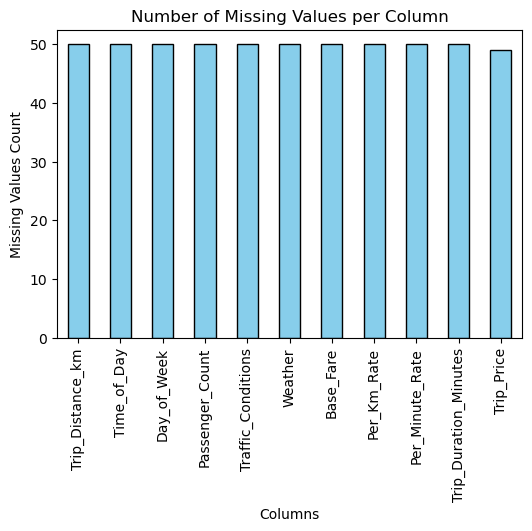

In [58]:

data.isnull().sum().plot(kind='bar', figsize=(6, 4), color='skyblue', edgecolor='black')
plt.title("Number of Missing Values per Column")
plt.xlabel("Columns")
plt.ylabel("Missing Values Count")
plt.show()


In [62]:
print("ALL MISSING VALES WERE HANDLED BEFORE")

ALL MISSING VALES WERE HANDLED BEFORE


In [66]:
data.fillna(method='ffill', inplace=True)


C:\Users\Awan\AppData\Local\Temp\ipykernel_8544\1984096990.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [68]:
data.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,27.203185,2.483000,3.503490,1.234700,0.293580,62.269370,56.702661
std,20.279101,1.101328,0.870971,0.431313,0.116004,32.017404,40.144015
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.662500,2.000000,2.730000,0.860000,0.190000,36.287500,34.262025
50%,25.775000,2.000000,3.530000,1.220000,0.290000,61.985000,49.787300
75%,38.687500,3.000000,4.262500,1.612500,0.390000,88.865000,68.719175
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


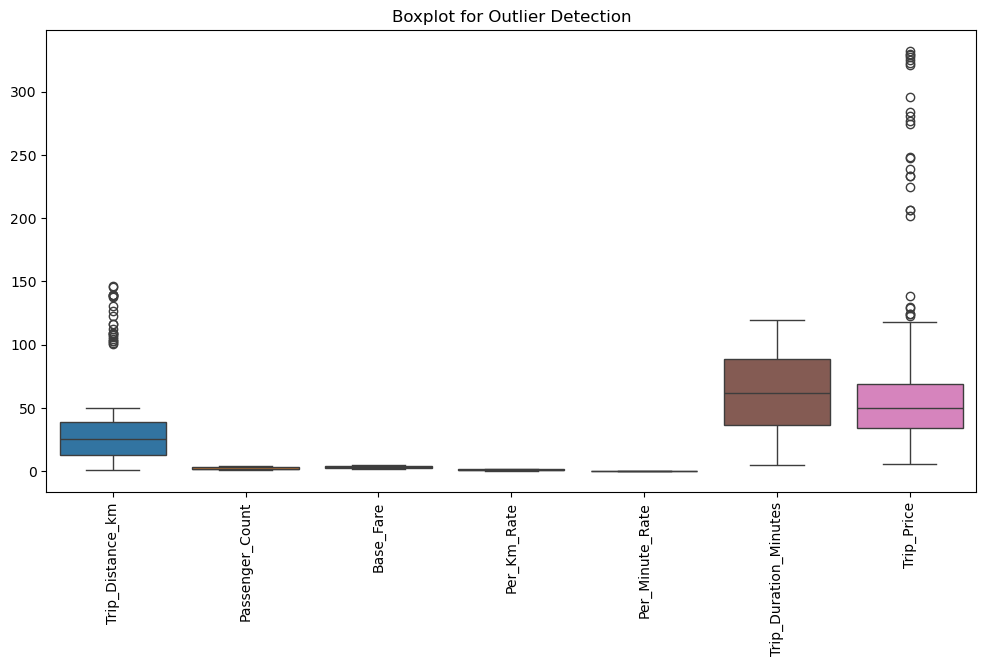

In [70]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.title('Boxplot for Outlier Detection')
plt.show()

In [72]:
categorical_features = ['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather']
label_encoders = {}

In [74]:
for col in categorical_features:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [76]:
X = data.drop(columns=['Trip_Price'])
y = data['Trip_Price']

In [78]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
X = X[~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)]
y = y.loc[X.index]

In [80]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [84]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [86]:
print("RMSE:", mean_squared_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

RMSE: 114.04769590165026
RMSE: 10.679311583695377


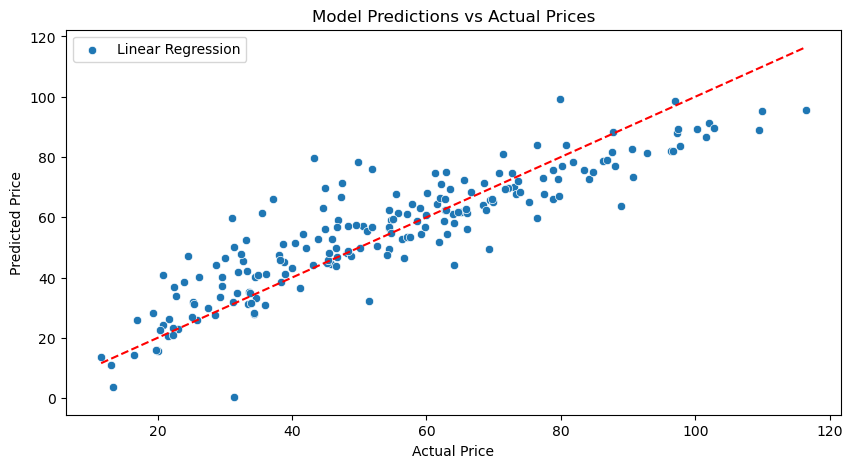

In [88]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=y_test, y=y_pred_lr, label='Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Model Predictions vs Actual Prices')
plt.legend()
plt.show()